In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
#Load Dataset
dataset = pd.read_csv('./leuanalysisNew1.csv')
dataset.head()

,CELL,SMEAR,INFIL,LI,BLAST,TEMP,REMISS
0,0.8,0.83,0.66,1.9,1.10,1.00,1
1,0.9,0.36,0.32,1.4,0.74,0.99,1
2,0.8,0.88,0.70,0.8,0.18,0.98,0
3,1.0,0.87,0.87,0.7,1.05,0.99,0
4,0.9,0.75,0.68,1.3,0.52,0.98,1


In [4]:
#Create x (we ignore the y variable)
x = dataset.drop('REMISS', axis=1).to_numpy()

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_transformed=sc.fit_transform(x)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


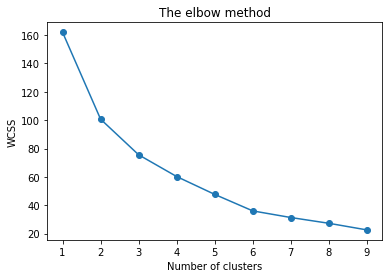

In [5]:
#Determine optimum number of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 100)
    kmeans.fit(data_transformed)
    wcss.append(kmeans.inertia_)
    
#Plot Elbow Method
plt.plot(range(1, 10), wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()  

For n_clusters= 2, The Silhouette Coefficient is 0.22972085065748718
For n_clusters= 3, The Silhouette Coefficient is 0.18310534303313306
For n_clusters= 4, The Silhouette Coefficient is 0.20631955740350025
For n_clusters= 5, The Silhouette Coefficient is 0.28185069808024893
For n_clusters= 6, The Silhouette Coefficient is 0.2444019584193471
For n_clusters= 7, The Silhouette Coefficient is 0.27065210293443615
For n_clusters= 8, The Silhouette Coefficient is 0.20009447518355383
For n_clusters= 9, The Silhouette Coefficient is 0.24072216091875787


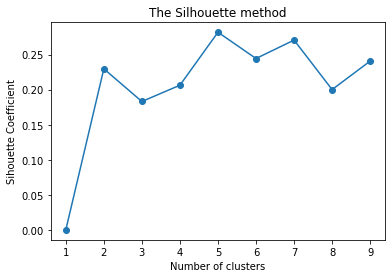

In [42]:
#Create Silhouette Coefficients
scores= [0]
for n_cluster in range(2, 10):
       kmeans = KMeans(n_clusters=n_cluster).fit(x)
       label = kmeans.labels_
       sil_coeff = silhouette_score(data_transformed, label, metric='euclidean')
       scores.append(sil_coeff) 
       print('For n_clusters= {}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

#Plot Silhouette
plt.plot(range(1,10), scores, marker='o')
plt.title('The Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Sihouette Coefficient') 
plt.show()    